# Task: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data.

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df= pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [27]:
# checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# checking the number of rows and columns
df.shape

(891, 12)

In [29]:
# checking the count of null 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Observations:
 1. passengerid, name, ticket has no significance on target variable
 2. There are 3 classes in titanic
 3. age has 177 and embarked has 2 and cabin has 687 missing values

# Data Reduction

In [31]:
# Imputing 'Cabin' with 'Unknown' and 'Embarked' with the most frequent value (mode)
df1 = df.fillna({'Cabin': 'Unknown', 'Embarked': df['Embarked'].mode().iloc[0]})
print(df1.isna().sum())  # Check for remaining missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64


In [32]:
# droping the age null records 
df1.dropna(inplace=True)

In [33]:
# checking the count of null 
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
df1.shape

(714, 12)

In [35]:
# dropping the column that are not required
df1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [36]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [37]:
# Splitting columns into Numerical and categorical columns
cat_cols=df1.select_dtypes(include=['object']).columns
num_cols=df1.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables are  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# EDA

Survived


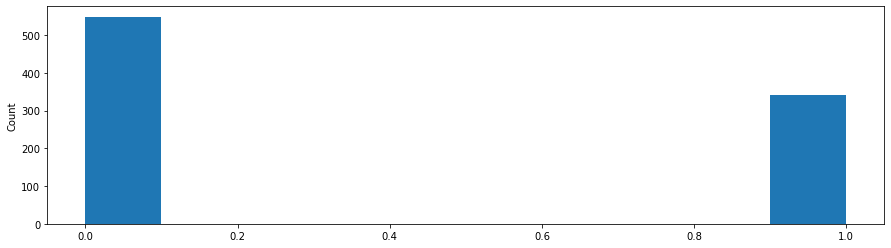

Pclass


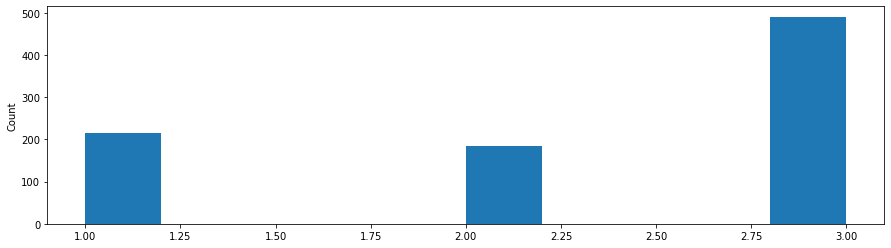

Age


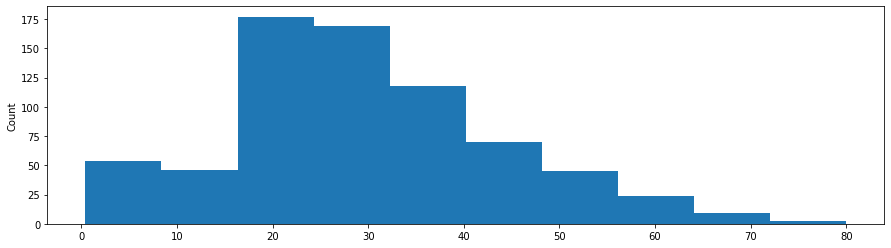

SibSp


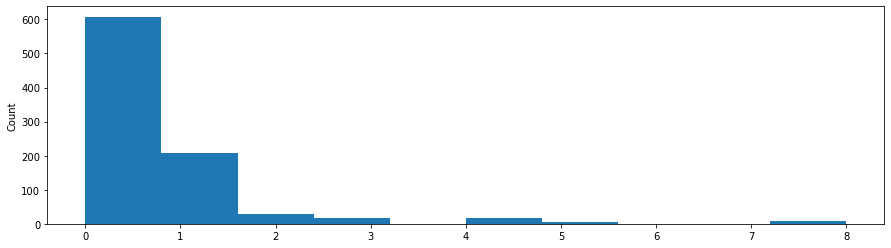

Parch


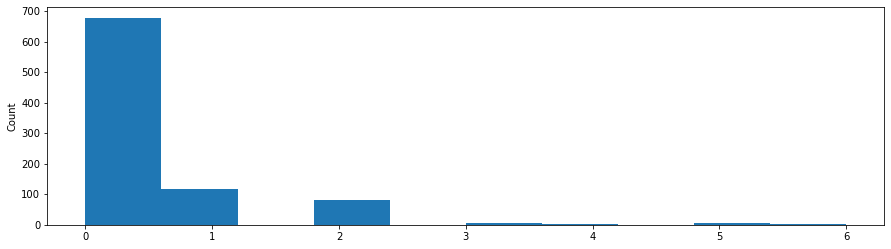

Fare


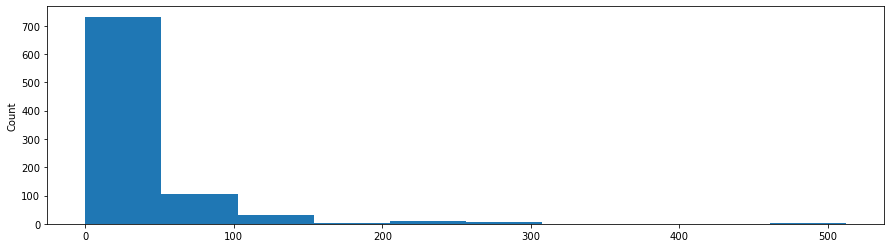

In [42]:
# For numerical columns
for col in num_cols:
  print(col)
  plt.figure(figsize=(15, 4))  # Create a figure with specified dimensions
  plt.hist(df[col])  # Create a basic histogram
  plt.ylabel("Count")  # Set y-axis label
  plt.show()

## Observations:
- Most people failed to survive in titanic
- Most people are travelling from 3rd class
- Most people age range vary from 20-40 and very few people are above 65
- Most people are travelling with no sibiling and spouse
- most people have no parent n children
- some outliers are present in fare

Sex


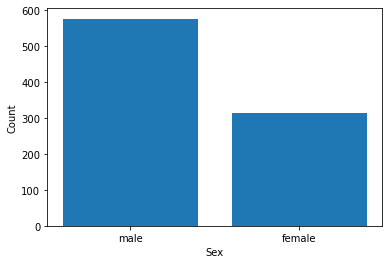

Cabin


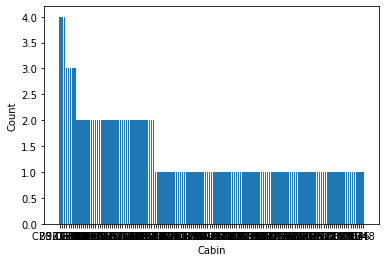

Embarked


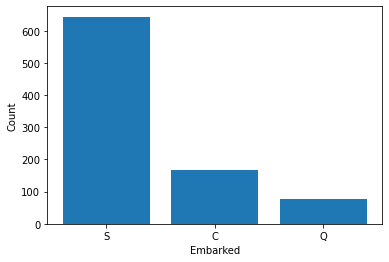

In [43]:
# For categorical columns
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Observations:
- People travelling in titanic are mostly male
- Most people embarked from southampton

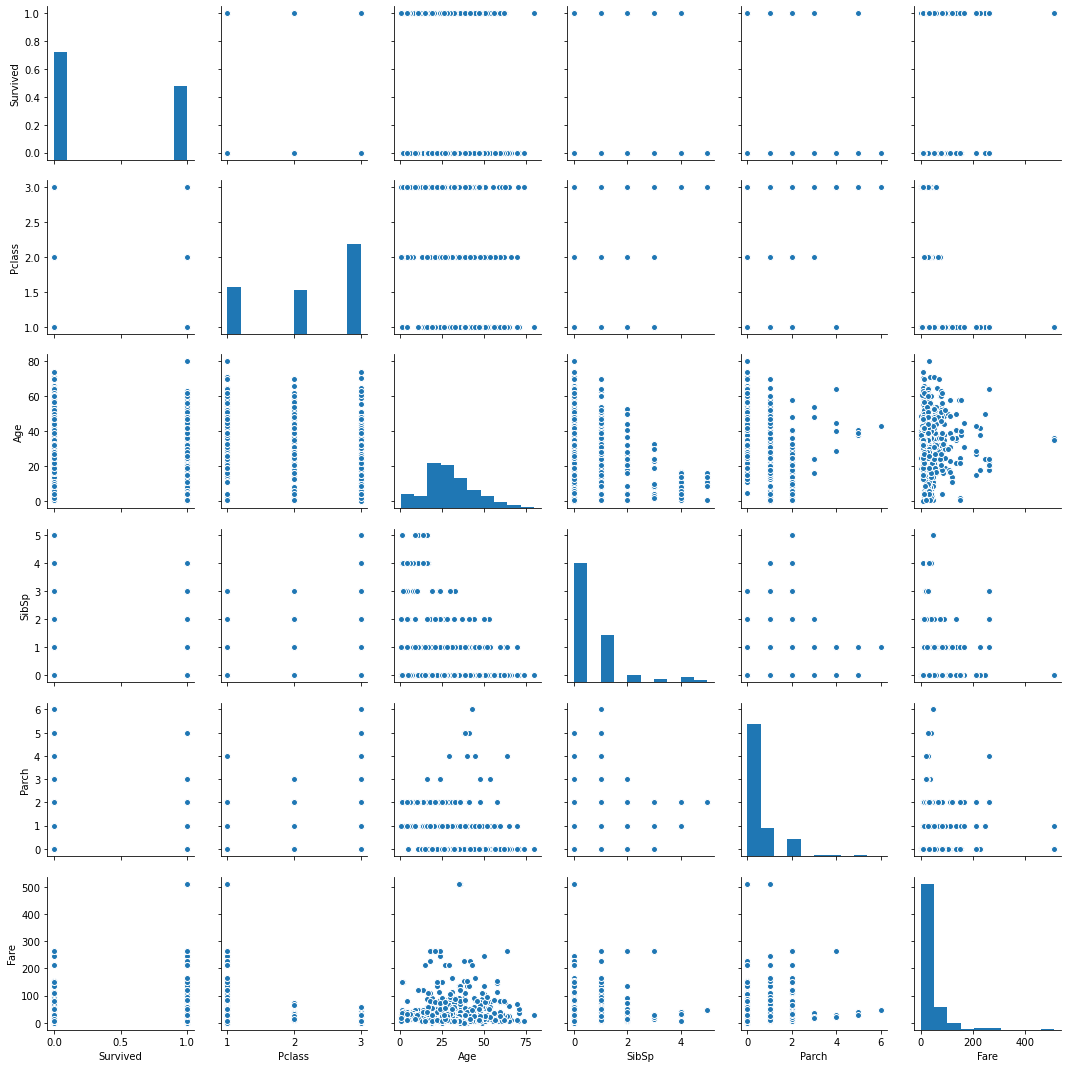

In [44]:
sns.pairplot(df1)
plt.show()

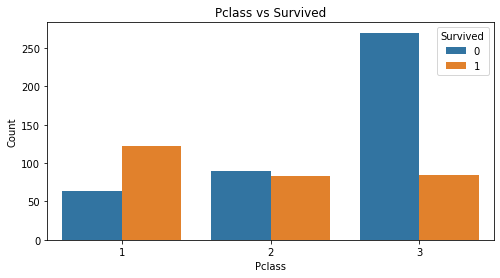

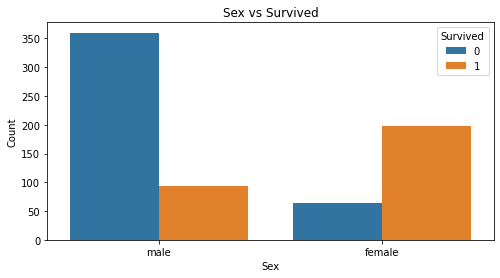

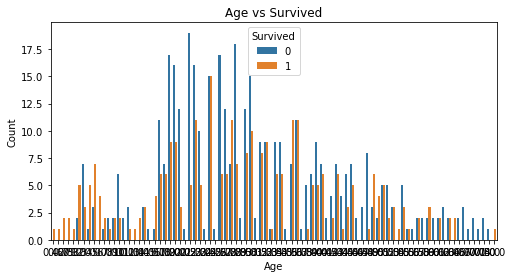

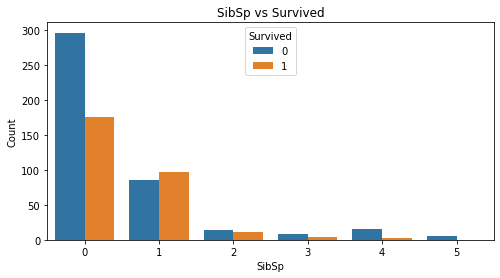

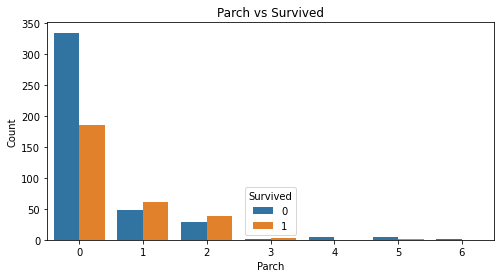

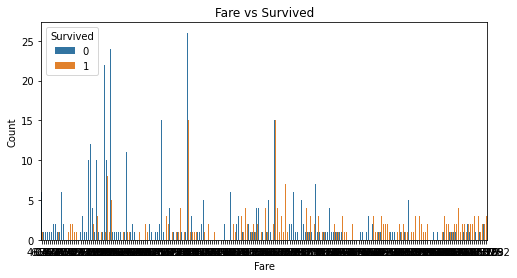

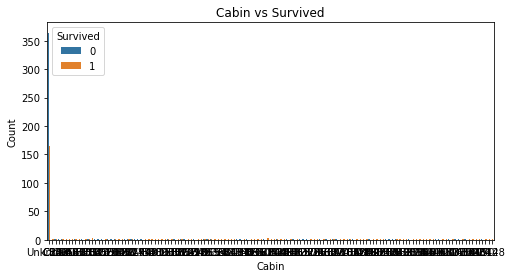

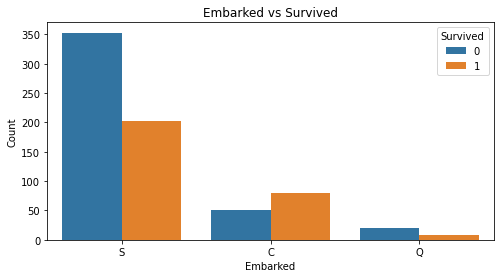

In [45]:
for col in df1.columns:
    if col != "Survived":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="Survived", data=df1)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs Survived")
        plt.show()

## Observations:
- Most 1st class people survived while 3rd class people died
- Most male died while most females survived
- Those having 1 sibiling or spouse has more chance of surviving 
- Those having 1 parent or child has more chance of surviving
- Those who embarked from Cherbourg has great chance of survining

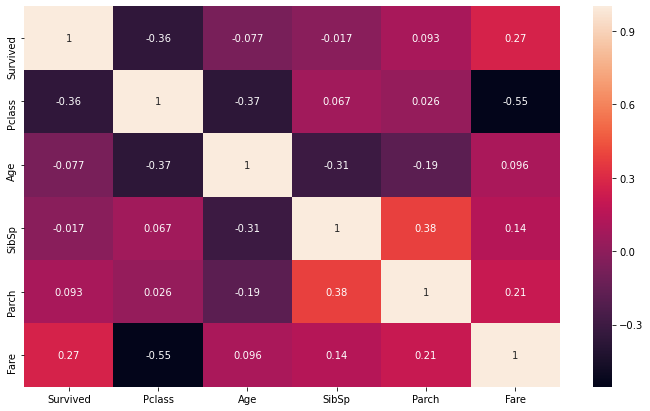

In [46]:
df2=df1.select_dtypes(exclude=['object'])
plt.figure(figsize=(12, 7))
sns.heatmap(df2.corr(),annot=True)
plt.show()

## Observations:
- Survival depends mostly on Pclass and Fare only
- 1st class has large Fare 

# Conclusion
Passengers in higher classes (Pclass) with higher fares generally had a better chance of survival. Additionally, those traveling with one sibling/spouse or one parent/child seemed to have a higher likelihood of surviving, possibly due to a sense of responsibility or shared decision-making during the evacuation. However, further analysis is needed to explore if these relationships hold true after accounting for other factors and to investigate the potential reasons behind them.

This initial EDA suggests that social class, family dynamics, and potentially even embarkation port (Cherbourg) played a role in survival outcomes